# Project 3: Predicting Posts From r/StarWars vs. r/startrek
by [Freda Xin](https://github.com/FredaXin)

## Problem Statement

Star Wars and Star Trek fan communities normally do not mingle. However, as the moderator of a small subreddit called r/scifi_universes, I encourage fans from both communities to have friendly and robust discussions on my forum. Since my subreddit is small, I encourage my subscribers to crosspost on other subreddits (such as r/startrek and r/StarWars) to attract more attentions to their posts and my subreddit. Therefore, I plan to create a bot which will suggest a subreddit (i.e. r/startrek or r/StarWars) to crosspost to based on the title and contents of the posts.


I will use the following classification models: Naive Bayes (Multinomial Naive Bayes and Gaussian Naive Bayes), Logitic Regression, KNN, and SVM. I will use AUC ROC as the metric to evaluate the models and select the best version.  

## Executive Summary

During the data collection process, I noticed that in order to collect the same amount of posts (i.e. 5000 for each subreddit), r/StarWars went over a much longer time span (780 days), comparing to r/startrek which only went over 420 days. Since our function only collects 'is_self' (i.e. text posts), This information indicated that r/startrek posts tend to have more text posts than r/StarWars. However, this information was not included in the features for our models, and we should keep in mind of the limitation of our models. 

During the EDA and data cleaning process, I used techniques such as tokenizing, lemmatizing, and creating custom stop words to preprocess our text data. I also engineered a feature to combine the title and the body of the post in order to maximize the amount of text information to train our models. These steps have improved our models' performance. 

During the modeling process, I used pipelines combined with grid-search for each model. I was especially interested in exploring the different results between using CountVectorizer vs. TFIDF: the former counts the occurrence of the words, where as the latter penalizes a word if it occurs often across the corpus and documents. I also tuned the models using a variety of hyper-parameters. I started with the Naive Bayes models, since I assumed that the models are simple and fast. I then explored more complex models such as logistic regression, KNN, and SVM. Does more complex and sophisticated models yield the best result? let's find out!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-3:-Predicting-Posts-From-r/StarWars-vs.-r/startrek" data-toc-modified-id="Project-3:-Predicting-Posts-From-r/StarWars-vs.-r/startrek-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project 3: Predicting Posts From r/StarWars vs. r/startrek</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Import-libraries-and-read-in-the-data" data-toc-modified-id="Import-libraries-and-read-in-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import libraries and read in the data</a></span></li><li><span><a href="#Preliminary-EDA" data-toc-modified-id="Preliminary-EDA-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Preliminary EDA</a></span></li><li><span><a href="#EDA-and-Data-Cleaning" data-toc-modified-id="EDA-and-Data-Cleaning-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>EDA and Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Check-data-types" data-toc-modified-id="Check-data-types-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Check data types</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Missing values</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#EDA-Continued:-Compare-r/startrek-with-r/StarWars" data-toc-modified-id="EDA-Continued:-Compare-r/startrek-with-r/StarWars-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>EDA Continued: Compare r/startrek with r/StarWars</a></span><ul class="toc-item"><li><span><a href="#First-impression" data-toc-modified-id="First-impression-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>First impression</a></span></li><li><span><a href="#'num_comments'" data-toc-modified-id="'num_comments'-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>'num_comments'</a></span></li><li><span><a href="#'selftext_length'" data-toc-modified-id="'selftext_length'-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>'selftext_length'</a></span></li><li><span><a href="#Other-Categorical-features" data-toc-modified-id="Other-Categorical-features-1.7.4"><span class="toc-item-num">1.7.4&nbsp;&nbsp;</span>Other Categorical features</a></span></li></ul></li><li><span><a href="#Pre-Processing" data-toc-modified-id="Pre-Processing-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Pre-Processing</a></span><ul class="toc-item"><li><span><a href="#Tokenizing,--Lemmatizing,-and-Custom-Stopwords" data-toc-modified-id="Tokenizing,--Lemmatizing,-and-Custom-Stopwords-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Tokenizing,  Lemmatizing, and Custom Stopwords</a></span></li><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>CountVectorizer</a></span></li><li><span><a href="#Find-the-most-common-words-in-r/startrek-vs.-r/StarWars" data-toc-modified-id="Find-the-most-common-words-in-r/startrek-vs.-r/StarWars-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>Find the most common words in r/startrek vs. r/StarWars</a></span><ul class="toc-item"><li><span><a href="#r/startrek" data-toc-modified-id="r/startrek-1.8.3.1"><span class="toc-item-num">1.8.3.1&nbsp;&nbsp;</span>r/startrek</a></span></li><li><span><a href="#r/StarWars" data-toc-modified-id="r/StarWars-1.8.3.2"><span class="toc-item-num">1.8.3.2&nbsp;&nbsp;</span>r/StarWars</a></span></li><li><span><a href="#Ploting-r/startrek-and-r/StarWars" data-toc-modified-id="Ploting-r/startrek-and-r/StarWars-1.8.3.3"><span class="toc-item-num">1.8.3.3&nbsp;&nbsp;</span>Ploting r/startrek and r/StarWars</a></span></li></ul></li><li><span><a href="#Create-custom-stopwords" data-toc-modified-id="Create-custom-stopwords-1.8.4"><span class="toc-item-num">1.8.4&nbsp;&nbsp;</span>Create custom stopwords</a></span></li></ul></li><li><span><a href="#Model-Preparation" data-toc-modified-id="Model-Preparation-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Model Preparation</a></span></li><li><span><a href="#Train,-Test-Split" data-toc-modified-id="Train,-Test-Split-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Train, Test Split</a></span><ul class="toc-item"><li><span><a href="#Check-distributions-of-Y-to-make-sure-we-have-balanced-classes" data-toc-modified-id="Check-distributions-of-Y-to-make-sure-we-have-balanced-classes-1.10.1"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Check distributions of Y to make sure we have balanced classes</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-1.11.1"><span class="toc-item-num">1.11.1&nbsp;&nbsp;</span>Evaluation Metric</a></span></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-1.11.2"><span class="toc-item-num">1.11.2&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Naive-Bayes-Models" data-toc-modified-id="Naive-Bayes-Models-1.11.3"><span class="toc-item-num">1.11.3&nbsp;&nbsp;</span>Naive Bayes Models</a></span><ul class="toc-item"><li><span><a href="#CountVectorizer-+-Multinomial-Naive-Bayes" data-toc-modified-id="CountVectorizer-+-Multinomial-Naive-Bayes-1.11.3.1"><span class="toc-item-num">1.11.3.1&nbsp;&nbsp;</span>CountVectorizer + Multinomial Naive Bayes</a></span></li><li><span><a href="#TfidfVectorizer-+-Gaussian-Naive-Bayes" data-toc-modified-id="TfidfVectorizer-+-Gaussian-Naive-Bayes-1.11.3.2"><span class="toc-item-num">1.11.3.2&nbsp;&nbsp;</span>TfidfVectorizer + Gaussian Naive Bayes</a></span></li></ul></li><li><span><a href="#Logistic-Regression-Models" data-toc-modified-id="Logistic-Regression-Models-1.11.4"><span class="toc-item-num">1.11.4&nbsp;&nbsp;</span>Logistic Regression Models</a></span><ul class="toc-item"><li><span><a href="#CountVectorizer-+-LogisticRegression" data-toc-modified-id="CountVectorizer-+-LogisticRegression-1.11.4.1"><span class="toc-item-num">1.11.4.1&nbsp;&nbsp;</span>CountVectorizer + LogisticRegression</a></span></li><li><span><a href="#TfidfVectorizer+-LogisticRegression" data-toc-modified-id="TfidfVectorizer+-LogisticRegression-1.11.4.2"><span class="toc-item-num">1.11.4.2&nbsp;&nbsp;</span>TfidfVectorizer+ LogisticRegression</a></span></li></ul></li><li><span><a href="#KNN-model" data-toc-modified-id="KNN-model-1.11.5"><span class="toc-item-num">1.11.5&nbsp;&nbsp;</span>KNN model</a></span><ul class="toc-item"><li><span><a href="#CountVectorizer-+-KNN" data-toc-modified-id="CountVectorizer-+-KNN-1.11.5.1"><span class="toc-item-num">1.11.5.1&nbsp;&nbsp;</span>CountVectorizer + KNN</a></span></li></ul></li><li><span><a href="#SVM" data-toc-modified-id="SVM-1.11.6"><span class="toc-item-num">1.11.6&nbsp;&nbsp;</span>SVM</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#Define-functions-that-will-generate-and-display-AUC-ROC-scores-for-all-the-models" data-toc-modified-id="Define-functions-that-will-generate-and-display-AUC-ROC-scores-for-all-the-models-1.12.1"><span class="toc-item-num">1.12.1&nbsp;&nbsp;</span>Define functions that will generate and display AUC ROC scores for all the models</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Multinomial-Naive-Bayes" data-toc-modified-id="Multinomial-Naive-Bayes-1.13.1"><span class="toc-item-num">1.13.1&nbsp;&nbsp;</span>Multinomial Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-1.13.1.1"><span class="toc-item-num">1.13.1.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#ROC-Curve-and-AUC-ROC" data-toc-modified-id="ROC-Curve-and-AUC-ROC-1.13.1.2"><span class="toc-item-num">1.13.1.2&nbsp;&nbsp;</span>ROC Curve and AUC ROC</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.13.2"><span class="toc-item-num">1.13.2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Interpret-Coefficients" data-toc-modified-id="Interpret-Coefficients-1.13.2.1"><span class="toc-item-num">1.13.2.1&nbsp;&nbsp;</span>Interpret Coefficients</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Limitations-and-Future-Steps" data-toc-modified-id="Limitations-and-Future-Steps-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>Limitations and Future Steps</a></span></li></ul></li></ul></div>

## Import libraries and read in the data

In [1]:
!pip install tabulate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, roc_curve, auc, make_scorer, roc_auc_score


import time

# Styling 
from IPython.display import HTML, display
import tabulate

%matplotlib inline

In [3]:
df = pd.read_csv('../data/final.csv')

## Preliminary EDA 

In [4]:
df.head()

,Unnamed: 0,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,0,"The more I think on it, Rian’s treatment of Sn...",Obviously The Last Jedi has its fans and it’s ...,StarWars,1523027283,NickMoore30,155,168,True,2018-04-06
1,1,"Tea, Earl Grey, Hot.",Did anyone ever think why Captain Picard alway...,startrek,1567337333,OX_Bigly,26,1,True,2019-09-01
2,2,The most improbable thing in Star trek imo,Just watched an episode of DS9 with Rom and Le...,startrek,1575721353,castiel65,6,1,True,2019-12-07
3,3,Why did the Voyager crew ever go in space again?,Call me a gutless mah'tog if you want. But if ...,startrek,1544332908,zombiecmh,6,1,True,2018-12-09
4,4,REVOLUTION,"Brother, sisters!! We have laser weapons and m...",startrek,1551593655,svetambara,5,0,True,2019-03-03


In [5]:
# Drop columns: 'Unnamed: 0', 'is_self'. These 2 columns are not irrelevant. 
df.drop(columns=['Unnamed: 0', 'is_self'], inplace=True)

## EDA and Data Cleaning

In [6]:
# Check the shape of the data
df.shape

(10000, 8)

### Check data types

1. All columns are in the correct data types
2. The most frequent values of 'selftext' is '[removed]'. This is caused by mods removing some posts.
3. The most frequent values of 'author' is '[deleted]'. This is caused by redditors deleting their acocunts.
4. The unique value of 'author' is 7250, where as total count is 10000. This means some redditors post more than once in a subreddit. This information might help us to predict which subreddit a post comes from. I will explore this feature in the latter EDA sections. 
5. 'num_comments' and 'score' might be two helpful features to have: since there are about 228k members in the Star Trek subreddit, and 1.4m members in the Star Wars subreddit, if a post has many comments or very high score (num of upvotes - num of downvotes), it might be likely to be in the Star Wars Subreddit. In the following EDA process, I will explore whether this two features are worth including. 

In [7]:
# Check basic info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
title           10000 non-null object
selftext        9181 non-null object
subreddit       10000 non-null object
created_utc     10000 non-null int64
author          10000 non-null object
num_comments    10000 non-null int64
score           10000 non-null int64
timestamp       10000 non-null object
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


In [8]:
# Check numerical columns
df.describe()

,created_utc,num_comments,score
count,1.000000e+04,10000.000000,10000.000000
mean,1.552608e+09,23.278500,26.209800
std,1.788631e+07,86.357567,366.741605
min,1.512610e+09,0.000000,0.000000
25%,1.543730e+09,2.000000,1.000000
50%,1.554483e+09,9.000000,1.000000
75%,1.567290e+09,22.000000,4.000000
max,1.578439e+09,5395.000000,24575.000000


In [9]:
# Check categorical columns
df.describe(include='object')

,title,selftext,subreddit,author,timestamp
count,10000,9181,10000,10000,10000
unique,9905,7855,2,7250,220
top,Someone on Enterprise must have really liked G...,[removed],startrek,[deleted],2018-01-06
freq,4,1168,5000,162,205


### Missing values 

1. There is no duplicated values (we filtered them out during the data collection process).
2. The only column that has missing values is 'selftext', i.e. the body of the posts
3. The meaning of missing values: sometimes redditors don't post anything in the body of the posts.
4. We don't want to just drop the rows or columns that have NaNs, because it will reduce the statistic power; We can just replace NaN with 'notext'. 

In [10]:
# Double check if there is any duplicated values
assert len(df[df.duplicated(keep=False)]) == 0

In [11]:
# Check number of NaNs
df.isnull().sum()

title             0
selftext        819
subreddit         0
created_utc       0
author            0
num_comments      0
score             0
timestamp         0
dtype: int64

In [12]:
# Check percentage of NaNs
df.isnull().mean()

title           0.0000
selftext        0.0819
subreddit       0.0000
created_utc     0.0000
author          0.0000
num_comments    0.0000
score           0.0000
timestamp       0.0000
dtype: float64

In [13]:
# Replace missing values with 'notext'
df = df.replace(np.nan, 'notext')

In [14]:
# Double check if all NaNs have been delt with
assert df.isnull().sum().sum() == 0

## Feature engineering

Two features will be enginnerred: 
1. Length of 'selftext_length': based on my outside research, the posts in r/startrek tend to be more wordy. So the length of the posts might be a good predictor. In the following EDA sections, I will explore if this feature is worth including. 
2. Combine columns 'title' and 'selftext'. Since we will vectorize these two text columns and train the models, we might as well combine the two. 

In [15]:
# Create a column for the length of 'selftext_length'
df['selftext_length'] = [len(i) for i in df['selftext']]

In [16]:
# Create a column combining columns 'title' and 'selftext'
df['title_and_selftext'] = df['title'] + ' ' + df['selftext']

Since we will develop classification models, we should convert our target 'subreddit' to binary values.

In [17]:
# Create new column 'outcome', convert our target 'subreddit' to binary values
df['outcome'] = [1 if i =='startrek' else 0 for i in df['subreddit']]

In [18]:
df.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,timestamp,selftext_length,title_and_selftext,outcome
0,"The more I think on it, Rian’s treatment of Sn...",Obviously The Last Jedi has its fans and it’s ...,StarWars,1523027283,NickMoore30,155,168,2018-04-06,1186,"The more I think on it, Rian’s treatment of Sn...",0
1,"Tea, Earl Grey, Hot.",Did anyone ever think why Captain Picard alway...,startrek,1567337333,OX_Bigly,26,1,2019-09-01,176,"Tea, Earl Grey, Hot. Did anyone ever think why...",1
2,The most improbable thing in Star trek imo,Just watched an episode of DS9 with Rom and Le...,startrek,1575721353,castiel65,6,1,2019-12-07,689,The most improbable thing in Star trek imo Jus...,1
3,Why did the Voyager crew ever go in space again?,Call me a gutless mah'tog if you want. But if ...,startrek,1544332908,zombiecmh,6,1,2018-12-09,419,Why did the Voyager crew ever go in space agai...,1
4,REVOLUTION,"Brother, sisters!! We have laser weapons and m...",startrek,1551593655,svetambara,5,0,2019-03-03,604,"REVOLUTION Brother, sisters!! We have laser we...",1


## EDA Continued: Compare r/startrek with r/StarWars

### First impression

1. For score, both subreddit receive similar score on average. (we will not use this feature in modelling).
2. For 'num_comments': posts on r/startrek on average receive more comments than r/StarWars, eventhough the former is a much smaller community (228k).
3. For 'selftext_length', as I expected, the average length of post for r/startrek tend to be longer than r/StarWars.
4. I will investigate futher into 2 and 3 in order to decide if they are good features for our models.

In [19]:
df.groupby(['subreddit']).mean()

,created_utc,num_comments,score,selftext_length,outcome
subreddit,,,,,
StarWars,1.543799e+09,18.1218,25.8184,467.5216,0.0
startrek,1.561418e+09,28.4352,26.6012,522.1934,1.0


###   'num_comments'

After comparing the 'num_comments' feature between r/startrek and r/StarWars, I found that both subreddit have very extreme outliers, i.e. some posts get extremely high number of comments.  
My options are: (1) get rid of outliers and include this feature; (2) let the outliers stay and do not include this feature in my model. 
Since I aim to include as much as text information as possible, I choose to not get rid of the outliners. Therefore, this feature will be excluded. 

###  'selftext_length'

Similar to 'num_comm, I found that both subreddit have very extreme outliers for post length, i.e. some posts are very long.  
My options are: (1) get rid of outliers and include this feature; (2) let the outliers stay and do not include this feature in my model. 
Since I aim to include as much as text information as possible, I choose to not get rid of the outliners. Therefore, this feature will be excluded.                             

### Other Categorical features

I will also explore other categorical features to see which ones are worth including besides 'title' and 'selftext'.

In [20]:
# 
df.loc[df['subreddit'] == 'startrek'].describe(include='object')

,title,selftext,subreddit,author,timestamp,title_and_selftext
count,5000,5000,5000,5000,5000,5000
unique,4974,4502,1,3331,175,4993
top,Someone on Enterprise must have really liked G...,notext,startrek,RagglenLove,2019-02-01,Someone on Enterprise must have really liked G...
freq,4,363,5000,26,79,4


In [21]:
df.loc[df['subreddit'] == 'StarWars'].describe(include='object')

,title,selftext,subreddit,author,timestamp,title_and_selftext
count,5000,5000,5000,5000,5000,5000
unique,4935,3362,1,3982,98,4975
top,Star Wars: David Benioff and D.B. Weiss Begin ...,[removed],StarWars,[deleted],2018-01-06,Star Wars Live-Action TV Show Reportedly Casts...
freq,3,1063,5000,147,205,3


Would the feature 'author' be a good predictor? Looking into the most frequent posters across these two subreddits, the most common 'author' were those who deleted their account. Dipite of the 'deleted', the rest of the top posters didn't post more than 0.3% for our dataset (i.e. they don't post that frequently). I don't think this feature will help to predict the outcome.

In [22]:
# Get the top 20 most frequent posters 
df['author'].value_counts(normalize=True, ascending=False).nlargest(20)

[deleted]               0.0162
RagglenLove             0.0029
bluejeans90210          0.0020
Samof94                 0.0017
Blackhand82             0.0016
TheFiveStarMan          0.0015
richterman2369          0.0014
CT-1138                 0.0014
ChetDinkly              0.0014
derstherower            0.0013
Bootlebat               0.0013
Smooth_Complaint        0.0013
deepFriedGarak          0.0013
Deceptitron             0.0012
Scotty_C_89             0.0012
MrPNGuin                0.0012
RandomTrekReview        0.0011
AldoPeck                0.0011
Interplanetary_Giraf    0.0011
Fishy1701               0.0010
Name: author, dtype: float64

## Pre-Processing

### Tokenizing,  Lemmatizing, and Custom Stopwords

- Lemmatizing coverts every word to its base lemma, i.e. its form in a dictionary. 
- I chose to lemmatize the text instead of stemming, since it often yields more accurate results, albeit slower. 
- In this section, I will tokenize, lemmatize, using stopwords to pre-process the data. I will then create a list of custom stopwords to be used in the pipelines for modeling. 

In [23]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+') # We only keep words 

# Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [24]:
# Create a for loop to tokenize and lemmatize each post 
# Reference: https://github.com/a-bergman/Reddit-Post-Classification/blob/master/Code/Preprocessing%20%26%20Modeling.ipynb
lemmatized_text = []
for post in df['title_and_selftext']:
    tokens = tokenizer.tokenize(post.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text.append(" ".join(lemmatized))

In [25]:
# Create a new column called 'lemmatized_text'
df['lemmatized_text'] = lemmatized_text

In [26]:
df.head(2)

,title,selftext,subreddit,created_utc,author,num_comments,score,timestamp,selftext_length,title_and_selftext,outcome,lemmatized_text
0,"The more I think on it, Rian’s treatment of Sn...",Obviously The Last Jedi has its fans and it’s ...,StarWars,1523027283,NickMoore30,155,168,2018-04-06,1186,"The more I think on it, Rian’s treatment of Sn...",0,the more i think on it rian s treatment of sno...
1,"Tea, Earl Grey, Hot.",Did anyone ever think why Captain Picard alway...,startrek,1567337333,OX_Bigly,26,1,2019-09-01,176,"Tea, Earl Grey, Hot. Did anyone ever think why...",1,tea earl grey hot did anyone ever think why ca...


### CountVectorizer

- In order to analysize the distribution of each word in the posts, I will use CountVectorizer in the EDA process to transform the column 'lemmatized_text' into a sparse matrix.
- This step is just to analyze and visulize the distribution of words. 
- In the modelling section, I will try out both CountVectorizer and TFIDF. 

In [27]:
# Instantiate CountVectorizer, add stop_words
cvec = CountVectorizer(stop_words='english')
# fit_tranform
vectorized_text = cvec.fit_transform(df['lemmatized_text'])
# Turn the sparse matrix into a df
df_sparse = pd.DataFrame(vectorized_text.toarray(),
             columns=cvec.get_feature_names())

In [28]:
# Check the shape of dataframe
df_sparse.shape

(10000, 28202)

In [29]:
# Create a new dataframe using the top 50 most common words 
top_words = pd.DataFrame(df_sparse.sum().sort_values(ascending=False).nlargest(50), 
             columns=['frequency'])

Text(0.5, 0, 'Frequency of Words')

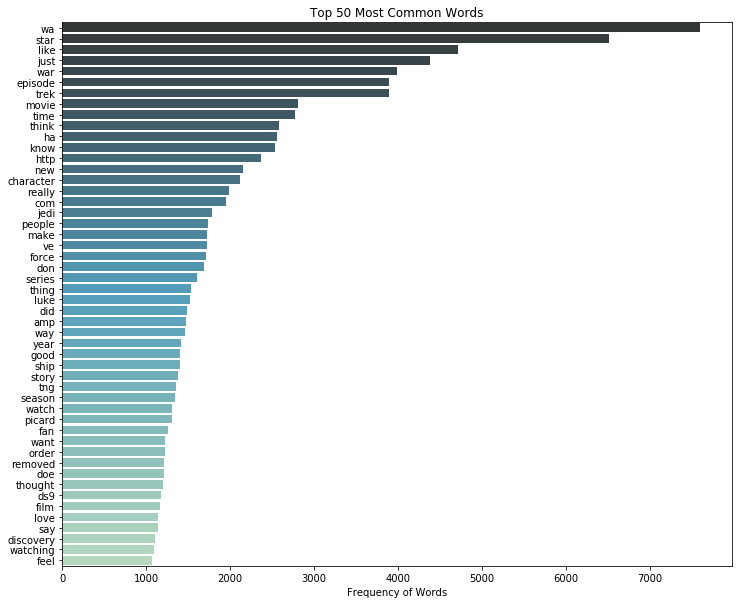

In [30]:
# Plot these most common words
plt.figure(figsize=(12,10))
ax = sns.barplot(x='frequency', y=top_words.index, data=top_words, palette="GnBu_d")
ax.set_title('Top 50 Most Common Words')
ax.set_xlabel('Frequency of Words')

Based on this bar chart, we can tell some of the most common words such 'jedi' or 'picard' are particular to its respective subreddit. However, some other words are common to both subreddits, such as 'like', 'just', 'thing', and we will add those words to our custom stopwords.

### Find the most common words in r/startrek vs. r/StarWars

I will find the top 50 most common words in each subreddit: r/startrek and r/StarWars, get the intersection of these two group of words, and add those words in the custom stop_words.

#### r/startrek

In [31]:
# Filter dataframe by outcome
df_startrek = df.loc[df['outcome']== 1]

In [32]:
# Instantiate CountVectorizer, add stop_words
cvec_startrek = CountVectorizer(stop_words='english')
# fit_tranform
vectorized_text_startrek = cvec_startrek.fit_transform(df_startrek['lemmatized_text'])
# Turn the sparse matrix into a df
df_sparse_startrek = pd.DataFrame(vectorized_text_startrek.toarray(),
                                  columns=cvec_startrek.get_feature_names())

In [33]:
# Check the shape of dataframe
df_sparse_startrek.shape

(5000, 20562)

In [34]:
# Select the top 50 most requent words in r/startrek and turn them into a dataframe
top_words_startrek = pd.DataFrame(df_sparse_startrek.sum().sort_values(ascending=False).nlargest(50), 
                                  columns=['frequency'])

In [35]:
# Check the head of the dataframe
top_words_startrek.head()

,frequency
trek,3871
wa,3813
star,3361
episode,2835
like,2407


#### r/StarWars

In [36]:
# Filter dataframe by outcome
df_starwars = df.loc[df['outcome']==0]

In [37]:
# Instantiate CountVectorizer, add stop_words
cvec_starwars = CountVectorizer(stop_words='english')
# fit_tranform
vectorized_text_starwars = cvec_starwars.fit_transform(df_starwars['lemmatized_text'])
# Turn the sparse matrix into a df
df_sparse_starwars = pd.DataFrame(vectorized_text_starwars.toarray(),
                                  columns=cvec_starwars.get_feature_names())

In [38]:
# Check the shape of dataframe
df_sparse_starwars.shape

(5000, 17137)

In [39]:
# Select the top 50 most requent words in r/startrek and turn them into a dataframe
top_words_starwars = pd.DataFrame(df_sparse_starwars.sum().sort_values(ascending=False).nlargest(50), 
                                  columns=['frequency'])

In [40]:
# Check the head of the dataframe
top_words_starwars.head()

,frequency
wa,3784
war,3514
star,3151
like,2304
movie,2097


#### Ploting r/startrek and r/StarWars

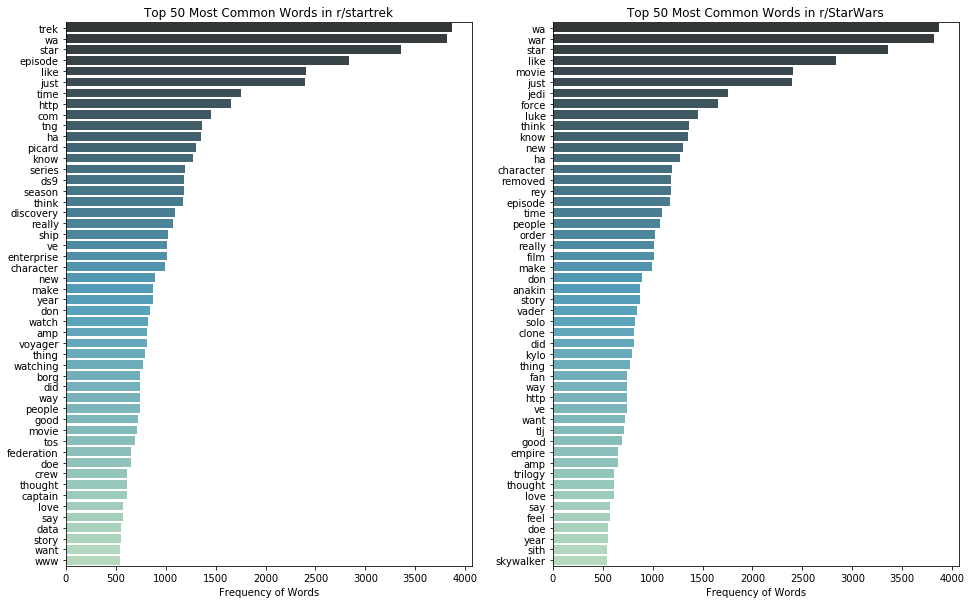

In [41]:
# Plot the frequency of words.
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

sns.barplot(x='frequency', y=top_words_startrek.index, data=top_words_startrek, ax=ax[0], palette="GnBu_d")
ax[0].set_title('Top 50 Most Common Words in r/startrek')
ax[0].set_xlabel('Frequency of Words')

sns.barplot(x='frequency', y=top_words_starwars.index, data=top_words_startrek, ax=ax[1], palette="GnBu_d")
ax[1].set_title('Top 50 Most Common Words in r/StarWars')
ax[1].set_xlabel('Frequency of Words');

From this bar chart, we can see that some words are common to both subreddits, such as 'wa', 'like', 'just', 'time'. Those words won't be great predictors, and will be added to the custom stopwords. 

### Create custom stopwords
- I will find the intersect of the most common words from both subreddits and add them to the custom stopwords
- I will pass in the custom stopwords in my models in the modeling section.

In [42]:
# Find the intersection and turn it into alist
custom_stopwords = list(set(top_words_startrek.index).intersection(set(top_words_starwars.index)))

In [43]:
# Add in the default stopwords
custom_stopwords.extend(list(ENGLISH_STOP_WORDS))

In addition, I will add the following words to the custom stopword, since those words are basically 'giveaways' for our prediciton. 

In [44]:
custom_stopwords.extend(['war', 'trek', 'startrek'])

## Model Preparation

In [45]:
# Select our feature and target here
# X is a vector, not a matrix 
X = df['lemmatized_text']
y = df['outcome']

## Train, Test Split

1. Since our dataset is large enough (n=10_000), we will reserve 20% (2k) of the data as test data. 
2. We will use 'stratify = y' to ensure the classes of y are balanced in both train and test.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

### Check distributions of Y to make sure we have balanced classes

Since the dataframe has been collected with balanced classes and we set 'stratify = y', unbalanced classes should not be an issue. 

In [47]:
# Check distribution of y, to see if y has unblanced classes
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: outcome, dtype: float64

In [48]:
# Check distribution of y_train
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: outcome, dtype: float64

In [49]:
# Check distribution of y_test
y_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: outcome, dtype: float64

## Modeling

- In the modeling process, I will first present my baseline model.  
- I will then develop 4 major categories of models: Naive Bayes Models (Multinomial and Gaussian), Logistic Regression Models, KNN model, and SVM. 
- I will use pipeline to combine each model (estimator) with different transformers, such as CountVectorizer and TFIDF.
- Based on the grid search's cross validation score, I will then fine tune the hyper-parameters for each model to achieve the optimal result. 

### Evaluation Metric

- Before I go into developing the models, I will briefly discuss the evaluation metric: AUC ROC. 

- "ROC (Receiver Operating Characteristic) is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes"[(reference)](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5). The higher the ROC, and the better it seperates the two classes r/startrek and r/StarWars. The ROC curve is plotted with True Positive Rate on y-aixs, against the False Positive Rate on the x-axis.

- AUC (Area Under the Curve) measures the entire two-dimensional area underneath the entire ROC curve. The closer AUC to 1, the better the model.

- I choose AUC ROC since I aim to find the optimal model that can separate the two classes r/startrek and r/StarWars really well. 

- I will also consider the amount of time each model take to fit. If two models have similar AUC ROC scores, the one that runs faster will be the model we choose. 

###  Baseline Model

Baseline Model is just the percentage of the postive class. i.e. 0.5.  The AUC ROC score is also 0.5 (i.e. it does not seperate the positive class vs. the negative class at all.) 

In [50]:
y_test.value_counts(normalize=True)[0]

0.5

### Naive Bayes Models

- Naive Bayes Models are based on Bayes' Theorem. Using Naive Bayes Models, we can calculate the probability of a post being on r/startrek given certain words they use in their post. 
- The advantage of Naive Bayes Models: they are simple are fast, and work well with high-dimensional datasets, which is our case here. 
- The disadvantage of Naive Bayes Models: very few tunable parameters. 

#### CountVectorizer + Multinomial Naive Bayes

"Multinomial Naive Bayes is appropriate when our features are variables that take on only positive integer counts"    (reference: lab week 5).  
Since I will use CountVectorizer to transform the feature into a spare Matrix consists of positive int, Multinomial Naive Bayes is the appropriate model to use combining with CountVectorizer.

In [51]:
# Pipeline: CountVectorizer() + Multinomial Naive Bayes
pipe_mnb = Pipeline(steps=[
    ('cvec', CountVectorizer(stop_words=custom_stopwords)), 
    ('mnb', MultinomialNB())
])

pipe_params_mnb ={
    'cvec__max_features': [500, 700, 900],
    'cvec__ngram_range': [(1, 1), (1, 2)]
     
}

gs_mnb = GridSearchCV(pipe_mnb, 
                 pipe_params_mnb, 
                 cv=5,
                 scoring='roc_auc')

In [52]:
# Fit the model
# Start a timer
t0 = time.time()

gs_mnb.fit(X_train, y_train)

print(time.time() - t0);

23.121840000152588


In [53]:
# Check the optimal params
gs_mnb.best_params_

{'cvec__max_features': 900, 'cvec__ngram_range': (1, 1)}

In [54]:
# Train score
gs_mnb.score(X_train, y_train)

0.98614015625

In [55]:
# Cross val score on the whole dataset 
cross_val_score(gs_mnb.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.9843546999999999

In [56]:
# Test score
gs_mnb.score(X_test, y_test)

0.983268

The model performed realy well, and shows no apparent signs of overfitting (i.e. train score is similar to test score). The corss val score is similar to the test score, which means our test score is reliable.

#### TfidfVectorizer + Gaussian Naive Bayes 

- Since GaussianNB requires a dense matrix, and TfidfVectorizer( ) only returns sparse matrix, we need to define a custom transfomer, so we can slide it into our pipe.
- Referecne: https://stackoverflow.com/a/28384887/12739456

In [57]:
# Created a customized transformer to turn sparse matrix into dense matrix
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [58]:
# Pipe line: TfidfVectorizer() + Gaussian Naive Bayes
pipe_gnb = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words=custom_stopwords)),
    ('to_dense', DenseTransformer()),
    ('gnb', GaussianNB())
])

pipe_params_gnb ={
    'tfidf__max_features': [500, 700, 900],
    'tfidf__ngram_range': [(1, 1), (1, 2)]
    
}

gs_gnb = GridSearchCV(pipe_gnb, 
                 pipe_params_gnb, 
                 cv=5,
                 scoring='roc_auc')

In [59]:
# Fit the model
# Start a timer
t0 = time.time()

gs_gnb.fit(X_train, y_train)

print(time.time() - t0);

26.80634379386902


In [60]:
# Check the optimal params
gs_gnb.best_params_

{'tfidf__max_features': 900, 'tfidf__ngram_range': (1, 1)}

In [61]:
# Train score
gs_gnb.score(X_train, y_train)

0.9678557812499999

In [62]:
# Cross val score on the whole dataset 
cross_val_score(gs_gnb.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.9500748999999999

In [63]:
# Test score
gs_gnb.score(X_test, y_test)

0.9538389999999999

The model performed quite well, but shows slight signs of overfitting (i.e. train score is slightly higher than test score). The corss val score is similar to the test score, which means our test score is reliable.

### Logistic Regression Models

Two versions of logisitc regression model pipelines will be developed: one will combine with CountVectorizer, the other TfidfVectorizer. 
CountVectorizer counts the number of occurrences of word, whereas TfidfVectorizer penalized words that occur frequently across the documents and the corpus.
I'd like to know which transformer performs better. 

#### CountVectorizer + LogisticRegression

In [64]:
# Pipe line: CountVectorizer() + LogisticRegression
pipe_cvec = Pipeline(steps=[
    ('cvec', CountVectorizer(stop_words=custom_stopwords)), 
    ('lr', LogisticRegression(solver='liblinear', penalty='l1'))
])

pipe_params_cvec ={
    'cvec__max_features': [500, 700, 900],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'lr__C': [0.0001, 1]
    
}

gs_cvec = GridSearchCV(pipe_cvec, 
                 pipe_params_cvec, 
                 cv=5,
                 scoring='roc_auc')


In [65]:
# Fit the model
# Start a timer
t0 = time.time()

gs_cvec.fit(X_train, y_train)

print(time.time() - t0);

46.15935683250427


In [66]:
# Check the optimal params
gs_cvec.best_params_

{'cvec__max_features': 900, 'cvec__ngram_range': (1, 1), 'lr__C': 1}

In [67]:
# Train score
gs_cvec.score(X_train, y_train)

0.9939796875

In [68]:
# Cross val score on the whole dataset 
cross_val_score(gs_cvec.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9818223000000001

In [69]:
# Test score
gs_cvec.score(X_test, y_test)

0.9812274999999999

On the train data, the model performs really well, but it's slightly overfit. When using the CountVectorizer, the hyperparameter ngram_range: (1, 2) gives the best result. 

#### TfidfVectorizer+ LogisticRegression

In [70]:
# Pipe line: TfidfVectorizer() + LogisticRegression
pipe_tfidf = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words=custom_stopwords)), 
    ('lr', LogisticRegression(solver='liblinear', penalty='l1'))
])

pipe_params_tfidf ={
    'tfidf__max_features': [500, 700, 900],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'lr__C': [0.0001, 1]
    
}

gs_tfidf = GridSearchCV(pipe_tfidf, 
                 pipe_params_tfidf, 
                 cv=5,
                 scoring='roc_auc')

In [71]:
# Fit the model
# Start a timer
t0 = time.time()

gs_tfidf.fit(X_train, y_train)

print(time.time() - t0);

46.278427839279175


In [72]:
# Check the optimal params
gs_tfidf.best_params_

{'lr__C': 1, 'tfidf__max_features': 900, 'tfidf__ngram_range': (1, 1)}

In [73]:
# Train score
gs_tfidf.score(X_train, y_train)

0.98904915625

In [74]:
# Cross val score on the whole dataset
cross_val_score(gs_tfidf.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.9832949

In [75]:
# Test score
gs_tfidf.score(X_test, y_test)

0.9812045

The model performs really well on both train and test data, and only show slight sign of overfit. When using the TfidfVectorizer, the hyperparameter ngram_range: (1, 1) gives the best result. 

### KNN model

#### CountVectorizer + KNN

In [76]:
# Pipe line: CountVectorizer() + LogisticRegression
pipe_cvec = Pipeline(steps=[
    ('cvec', CountVectorizer(stop_words=custom_stopwords)), 
    ('knn', KNeighborsClassifier())
])

pipe_params_cvec ={
    'cvec__max_features': [500, 700, 900],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'knn__n_neighbors' : [50, 70]
    
}

gs_knn = GridSearchCV(pipe_cvec, 
                 pipe_params_cvec, 
                 cv=5,
                 scoring='roc_auc')


In [77]:
# Fit the model
# Start a timer
t0 = time.time()

gs_knn.fit(X_train, y_train)

print(time.time() - t0);

63.08849000930786


In [78]:
# Check the optimal params
gs_knn.best_params_

{'cvec__max_features': 500,
 'cvec__ngram_range': (1, 2),
 'knn__n_neighbors': 70}

In [79]:
# Train score
gs_knn.score(X_train, y_train)

0.92166821875

In [80]:
# Cross val score on the whole dataset
cross_val_score(gs_knn.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.9107706999999999

In [81]:
# Test score
gs_knn.score(X_test, y_test)

0.898642

The model performs okay on both train and test data, and show some signs of overfit. 

### SVM

My last model is the SVM model. Since this is a 'Black Box' model, the result won't be esay to interpret. I will use SVM to check the model's predicting power. 

In [82]:
pipe_svc = Pipeline(steps=[
    ('cvec', CountVectorizer(stop_words=custom_stopwords, max_features=900, ngram_range=(1, 1))), 
    ('svc', SVC(kernel='rbf', class_weight='balanced', probability=True))
])

pipe_params_svc ={
    #'cvec__max_features': [700, 900],
    #'cvec__ngram_range': [(1, 1), (1, 2)],
    'svc__C': [1, 10, 50],
    'svc__gamma': [0.0005, 0.001, 0.005],
}
gs_svc = GridSearchCV(pipe_svc, 
                 pipe_params_svc, 
                 cv=5,
                 scoring='roc_auc')

In [83]:
# Fit the model
# Start a timer
t0 = time.time()

gs_svc.fit(X_train, y_train)

print(time.time() - t0);

922.4706389904022


In [84]:
# Check the optimal params
gs_svc.best_params_

{'svc__C': 50, 'svc__gamma': 0.001}

In [85]:
# Train score
gs_svc.score(X_train, y_train)

0.99108534375

In [86]:
# Cross val score on the whole dataset
cross_val_score(gs_svc.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.9779403

In [87]:
# Test score
gs_svc.score(X_test, y_test)

0.976683

The model perfoms really well on the train data, but it shows signs of overfitting. It tooke quite some some time (almost 7 minutes!) to run.

## Model Selection

### Define functions that will generate and display AUC ROC scores for all the models

In [88]:
# Define a funciton that takes a list of models (could be a list of one model), 
# Returns the AUC ROC score
def evaluation_metrics(list_of_models, X, y):
    table = [['Model Name', 'AUC ROC']]
    for name, model in list_of_models:
        y_proba = model.predict_proba(X)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_proba[:,1])
        auc_roc = round(auc(false_positive_rate, true_positive_rate), 5)
        
        table.append([name, auc_roc])
    return table

In [89]:
# Define a funciton that will pretty-print tabular data in Python
def display_evaluation_metrics(table):
    return display(HTML(tabulate.tabulate(table, tablefmt='html')))

Among all models, the Multinomial Naive Bayes model performs the best, with an AUC ROC of 0.9833. This will be the model of our choice for prediction. The second best performing model is the Logistic Regression combined with CountVectorizer, with an ACU ROC of 0.98123. Since logistic regression models are more interpretable, I will use it to explain which features are the strongest predictors.

In [90]:
table_test = evaluation_metrics([('Multinomial Naive Bayes', gs_mnb), 
                                 ('Gaussian Naive Bayes', gs_gnb),
                                 ('Logistic Regression + CountVec', gs_cvec),
                                 ('Logistic Regression + TFIDF', gs_tfidf),
                                 ('KNN', gs_knn),
                                 ('SVM', gs_svc)
                                ],
                                X_test, y_test)

In [91]:
display_evaluation_metrics(table_test)

Model Name,AUC ROC
Multinomial Naive Bayes,0.98327
Gaussian Naive Bayes,0.95384
Logistic Regression + CountVec,0.98123
Logistic Regression + TFIDF,0.9812
KNN,0.89864
SVM,0.97668


## Model Evaluation

The model evaluation will contain two parts: 
1. The Multinomial Naive Bayes is our best model for prediciton. I will evaluate the model's performs based on it's predicting power.
2. The Logistic Regression model is our best model for interpretation. I will interpret the Coefficients based on the result of the logistic regression. 

###  Multinomial Naive Bayes 

#### Confusion Matrix

The Confusion Matrix gives us a summary of correct and incorrect predictions. It gives us 4 categories: true negative, false positive, false negative, and true negative. This will give us the information to calculate sensitivity (true positive rate), specificity (true negative rate), and false positive rate (1 - specificity). These components will be useful for understanding the AUC ROC, which is our metric of evaluation, since the ROC curve is a collection of specificity vs. sensitivity. 

In [92]:
y_pred = gs_mnb.predict(X_test)

In [93]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

In [94]:
cm = confusion_matrix(y_test, y_pred)

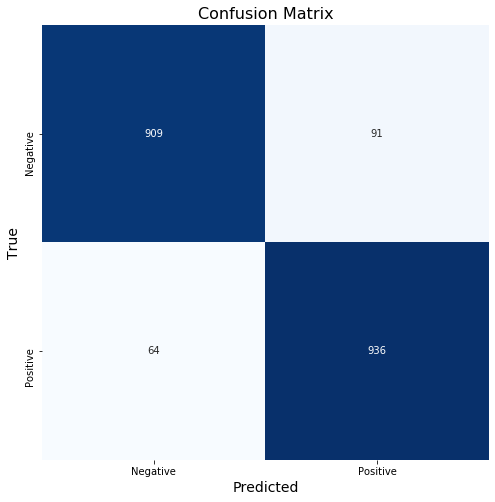

In [95]:
plt.figure(figsize = (8,8))
ax = plt.subplot()
sns.heatmap(cm, 
            annot=True, 
            ax = ax, 
            fmt='g', 
            cbar=False,
            cmap="Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix', size=16)
ax.set_xlabel('Predicted', size=14)
ax.set_ylabel('True', size=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive']);

For the Multinomial Naive Bayes model, the 4 classes of confusion matrix are as follows: 
- True Positive: 936
- False Positive (Type 1): 96
- True Negative: 909
- False Negative (Type 2): 64  

A perfect classifier would have only TP and TN, so its confusion matirx would have nonzero values only on the top-left to bottom right diagonal. As we can see here, the diagonal from top left to bottom right are our correct predictions (TN and TP) are in darker blue, which is very good, since we want the marjority of our predictions to be in these two classes.  

#### ROC Curve and AUC ROC

In [96]:
y_pred_proba = gs_mnb.predict_proba(X_test)

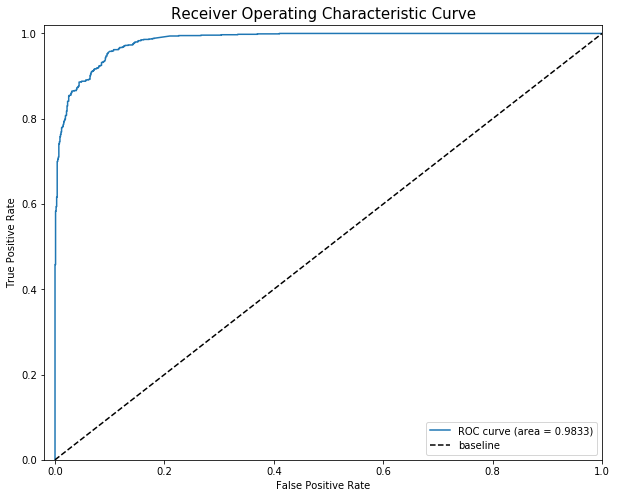

In [97]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
fpr, tpr, _= roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)


# Plot of a ROC curve for a specific class
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='baseline')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve', fontsize=15)
plt.legend(loc="lower right")


The ROC curve helps us to visualize our tradeoff between sensitivity and specificity and understand how well-separated our classes are. The ROC curve is generated by varying our threshold from 0 to 1. The best threshold is the point on the curve where it's closest to the top left corner. 

In addiction, the AUC ROC measures how well the classifier seperates the two classes, i.e. r/startrek vs. r/StarWars. AUC ROC score ranges from 0 to 1. The closer it is to 1, the better the classifier seperates the two classes. As we can see from the above plot, the Multinomial Naive Bayes' AUC ROC is very close to 1, which proves that the test data are well sperated by our classifier. 

### Logistic Regression

#### Interpret Coefficients

In [98]:
# Create a dataframe that conbines feature name and coefficients
top_features = pd.DataFrame(list(zip(gs_tfidf.best_estimator_.steps[0][1].get_feature_names(), 
                      gs_tfidf.best_estimator_.steps[1][1].coef_[0])), columns=['word', 'coefficient'])

In [99]:
# Find the top 10 strongest predictors for the positive class, i.e. r/startrek
df_1 = top_features.sort_values(by=['coefficient'], ascending=False).head(10)

In [100]:
# Find the top 10 strongest predictors for the negative class, i.e. r/StarWars
df_2 = top_features.sort_values(by=['coefficient'], ascending=False).tail(10)

In [101]:
df_1_and_2 = pd.concat([df_1, df_2], ignore_index=True)

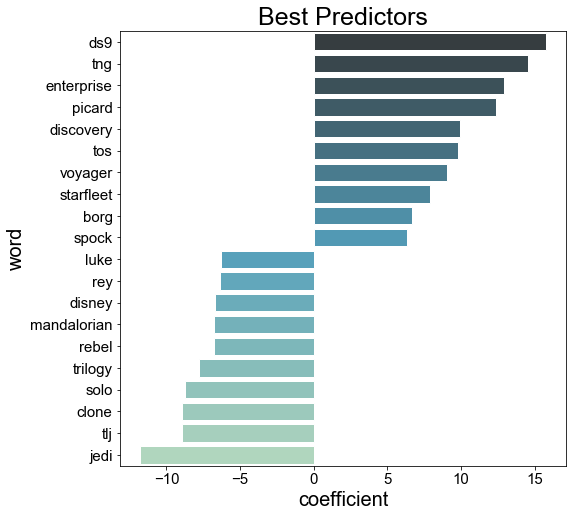

In [102]:
# Thanks to Varun for sharing this code! 
plt.figure(figsize=(8,8))
plt.title('Best Predictors',fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data=df_1_and_2 ,x='coefficient',y='word',orient='h', palette="GnBu_d")
plt.xlabel('coefficient',fontsize=20)
plt.ylabel('word',fontsize=20)
plt.tick_params(labelsize=15)

The top 10 strongest predictors for our positive class words like 'ds9', 'picard', 'tos' (the original series) etc. which are the common lingo for r/startrek; similarly, words like 'jedi', 'solo' are among the top predictors for the negative class r/StarWars. This result is not surprising: the best words to distinguish the two subreddits are the lingo that is particular to that community.

## Conclusion

Among the 4 categories of models, i.e. Naive Bayes, Logistic Regression, KNN, and SVM, the simple Multinomial Naive Bayes outperformed the others by a very small margin. Based on the AUC ROC score, the model is able to provide a very good threshold to separate the two classes, i.e. r/startrek and r/StarWars. In addition, Multinomial Naive Bayes runs faster than the others.  

I conclude that this model is sufficient to be used as part of the bot to make suggestions about a subreddit (i.e. r/startrek or r/StarWars) to crosspost to based on the title and contents of the posts.

## Limitations and Future Steps

**Limitations**

during the data collection process, important information was left out: Since we only collect posts with text, r/startrek have more of posts with text than r/StarWars. Our function was able to collect 5000 posts for r/startrek for the timespan of 420 days; in contrast, in order to collect the same amount of posts, r/StarWars needed a timespan of 780 days. This information could be an important predictor that we fail to consider at this time. 

The data we use to train the model do not include the comments. As we know, reddit comments are the goldmine where we can find a lot of valuable information. To further improve our model, we should consider including comments in our dataset. 

**Future Steps**:  
As my subreddit r/scifi_universes grows, I want to introduce more diversity of scifi universes, and to include people who are interested in other scifi universes such as Battlestar Galactica, or even the DC and Marvel universes. Therefore, I will need to expand my y classes, and go beyond binary classes. I will explore classification models which are more suitable for multi classes. 